# Z-оценка

In [25]:
import pandas as pd
import scipy.stats

import seaborn as sns

In [3]:
eng = pd.read_csv('Data/eng_test.csv', sep=';')
eng.head(n=3)

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES


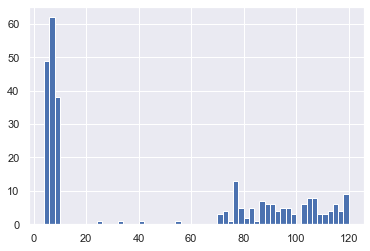

In [47]:
# Просмотрим распределение оценок за экзамены

eng['Score'].hist(bins=eng['Score'].nunique());

In [28]:
# Разделим наш df на 2 по типу экзамена

toefl = eng[eng['Exam'] == 'TOEFL']
ielts = eng[eng['Exam'] == 'IELTS']

pd.concat([toefl.describe().T.assign(exam='toefl'),
                  ielts.describe().T.assign(exam='ielts')]).set_index('exam')

,count,mean,std,min,25%,50%,75%,max
exam,,,,,,,,
toefl,125.0,93.776000,17.903804,25.0,81.0,94.0,107.0,120.0
ielts,149.0,6.432886,1.571126,4.0,5.0,6.5,8.0,9.0


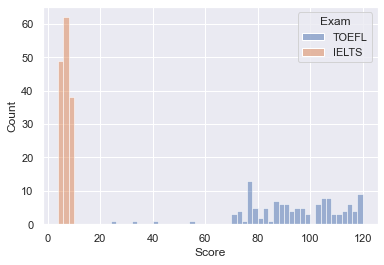

In [48]:
sns.histplot(data=eng, x="Score", hue="Exam", bins=eng['Score'].nunique());

In [53]:
# Рассчитаетм z_score. Считаем, что работаем с ген.совокупностью


# извлекаем X — считаем z-оценку для i-студента
i = 0
X = toefl['Score'][i]
M = toefl['Score'].mean()
sigma = toefl['Score'].std(ddof=0)

print('X, M, sigma =', X, M, sigma)

z_score = (X - M) / sigma
print('z_score =', z_score)

X, M, sigma = 77.0 93.776 17.83204486311091
z_score = -0.9407782522297513


In [55]:
# Обратная операция

z_new = 1.4706109
X_new = M + z_new * sigma

print(z_new, X_new, round(X_new))

1.4706109 119.99999954497991 120


In [58]:
# Воспользуемся библиотекой

scipy.stats.zscore(a=toefl['Score'])

0     -0.940778
1      0.629429
2      0.741586
3     -1.221172
4      1.470611
         ...   
269   -0.323911
270   -0.211754
271   -0.211754
272   -2.230591
273    0.685507
Name: Score, Length: 125, dtype: float64

In [61]:
toefl.loc[:, 'z-score'] = scipy.stats.zscore(toefl['Score'])
ielts.loc[:, 'z-score'] = scipy.stats.zscore(ielts['Score'])

In [65]:
eng = pd.concat(objs=[toefl, ielts], axis=0)
eng.head(n=3)

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586


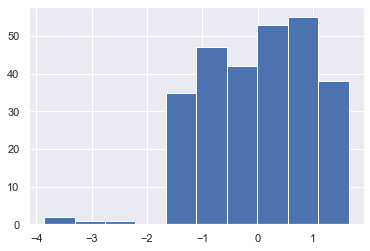

In [71]:
eng['z-score'].hist();

In [72]:
eng[eng['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [73]:
eng.groupby('Advanced')['z-score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: z-score, dtype: float64

In [74]:
eng.pivot_table(index='Advanced', values='z-score', aggfunc='mean')

,z-score
Advanced,
NO,-0.397672
YES,0.440499
